# Getting started

This notebook will guide you through the document scans we have prepared.

In [1]:
# Import common utils and the scanner library.
import os, sys

from PIL import Image, ImageDraw

In [2]:
# Check, and optionally configure, input and output directory.
import config
print(config.INPUT_DIRECTORY)
print(config.WRITE_DIRECTORY)

In [3]:
files = os.listdir(config.INPUT_DIRECTORY)
files

['focus_areas']

## Helper class

In [4]:
from scanner import CurriculumScanner

In [5]:
doc = CurriculumScanner('inputs/focus_areas/1.excerpt.pdf')

In [6]:
num_pages = len(doc.pages)
num_pages

1

In [7]:
# Each page in the document contains:
#  image = source image
#  file = JSON OCR data
#  boxes = an image file with the recognized boxes shown
page = doc.pages[0]
page

{'columns': [[96.0, 1088]],
 'file': 'scans/1.excerpt-2ffc44d977c343ae016fb2c042f6f865/0/1.excerpt-2ffc44d977c343ae016fb2c042f6f865-0_ocr.json',
 'image': 'scans/1.excerpt-2ffc44d977c343ae016fb2c042f6f865/0/1.excerpt-2ffc44d977c343ae016fb2c042f6f865-0.png',
 'boxes': 'scans/1.excerpt-2ffc44d977c343ae016fb2c042f6f865/0/1.excerpt-2ffc44d977c343ae016fb2c042f6f865-0_boxes.png'}

### Image

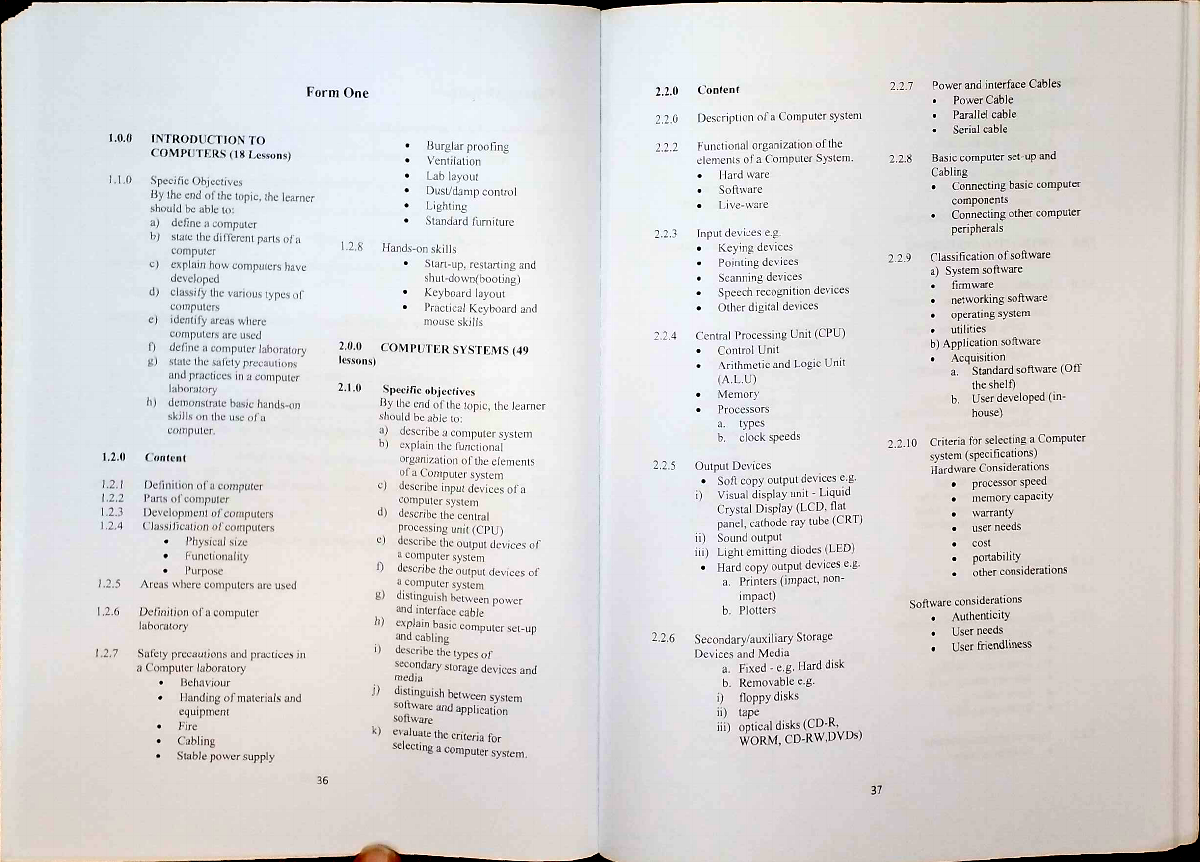

In [8]:
page_image = Image.open(page['image'])
page_image

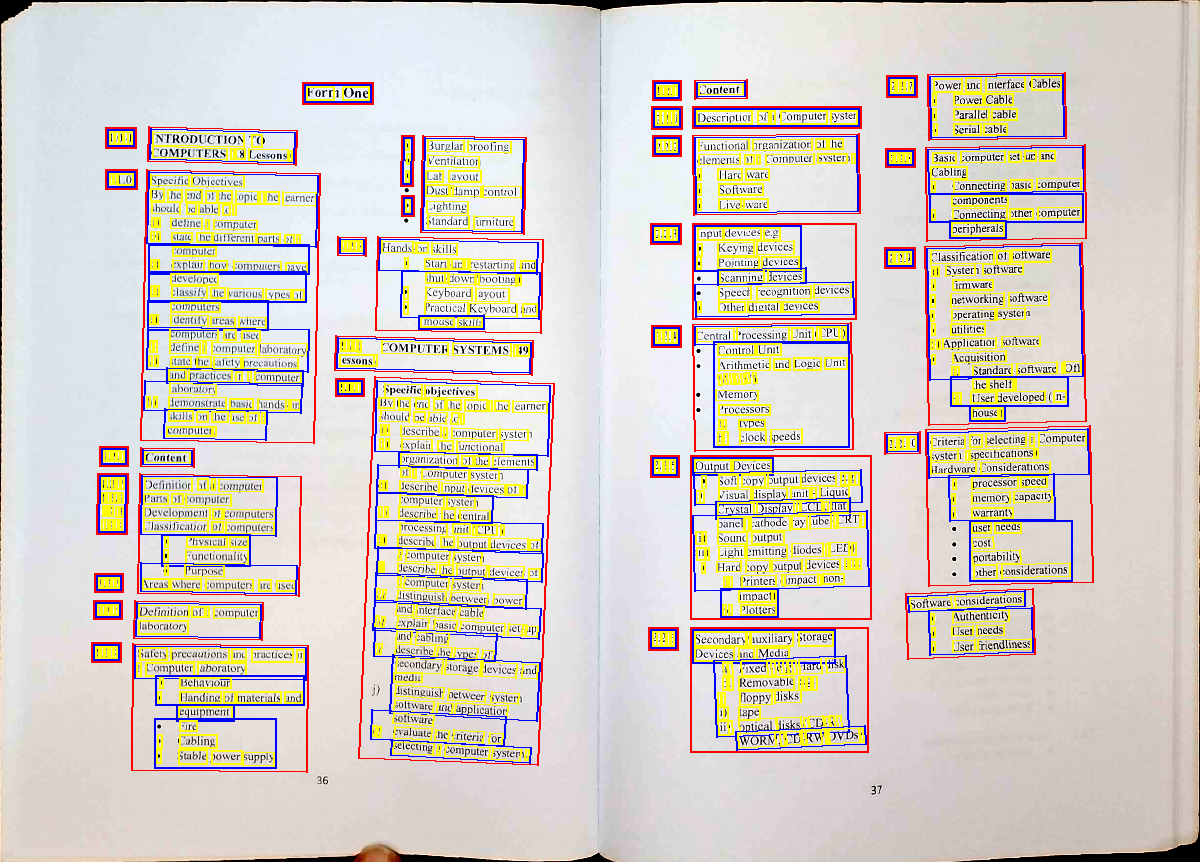

In [9]:
# To see the boxes
doc.draw_boxes(0)

### Page data

In [10]:
page_data = doc.get_page_data(0)
page_data.keys()


dict_keys(['text', 'pages'])

In [11]:
# page_data # = LOTS OF JSON
page_text = page_data['text']
print('All the text page without position data', page_text[0:100]+'...' )

All the text page without position data Form One
2.2.0
Content
2.2.7
Power and interface Cables
• Power Cable
• Parallel cable
. Serial cabl...


In [12]:
# pages
apage = page_data['pages'][0]
print("Example page props:", apage.keys() )
print('Page text=', apage['text'][0:100]+'...' )

Example page props: dict_keys(['confidence', 'height', 'width', 'property', 'blocks', 'text'])
Page text= Form One


2.2.0


Content


2.2.7


Power and interface Cables • Power Cable • Parallel cable . Ser...


In [13]:
# blocks
ablock = page_data['pages'][0]['blocks'][6]
print("Example block props:", ablock.keys())
print('Block text=', ablock['text'])

Example block props: dict_keys(['block_type', 'confidence', 'bounding_box', 'property', 'paragraphs', 'text'])
Block text= Description of a Computer system



In [14]:
# paragraphs
aparagraph = page_data['pages'][0]['blocks'][6]['paragraphs'][0]
print("Example paragraph props:", aparagraph.keys())
print('Paragraph text=', aparagraph['text'])

Example paragraph props: dict_keys(['confidence', 'bounding_box', 'property', 'words', 'text'])
Paragraph text= Description of a Computer system



In [15]:
# words
aword = page_data['pages'][0]['blocks'][6]['paragraphs'][0]['words'][0]
print("Example word props:", aword.keys() )
print('Word text=', aword['text'])

Example word props: dict_keys(['confidence', 'bounding_box', 'property', 'symbols', 'text'])
Word text= Description 


In [16]:
page_data['pages'][0]['blocks'][6]['paragraphs'][0]['words'][0].keys()

dict_keys(['confidence', 'bounding_box', 'property', 'symbols', 'text'])

# Helper methods

### Find a paragraph that contains a given word

found 1 matches
match vertices= [{'x': 110, 'y': 131}, {'x': 131, 'y': 131}, {'x': 131, 'y': 144}, {'x': 110, 'y': 144}]


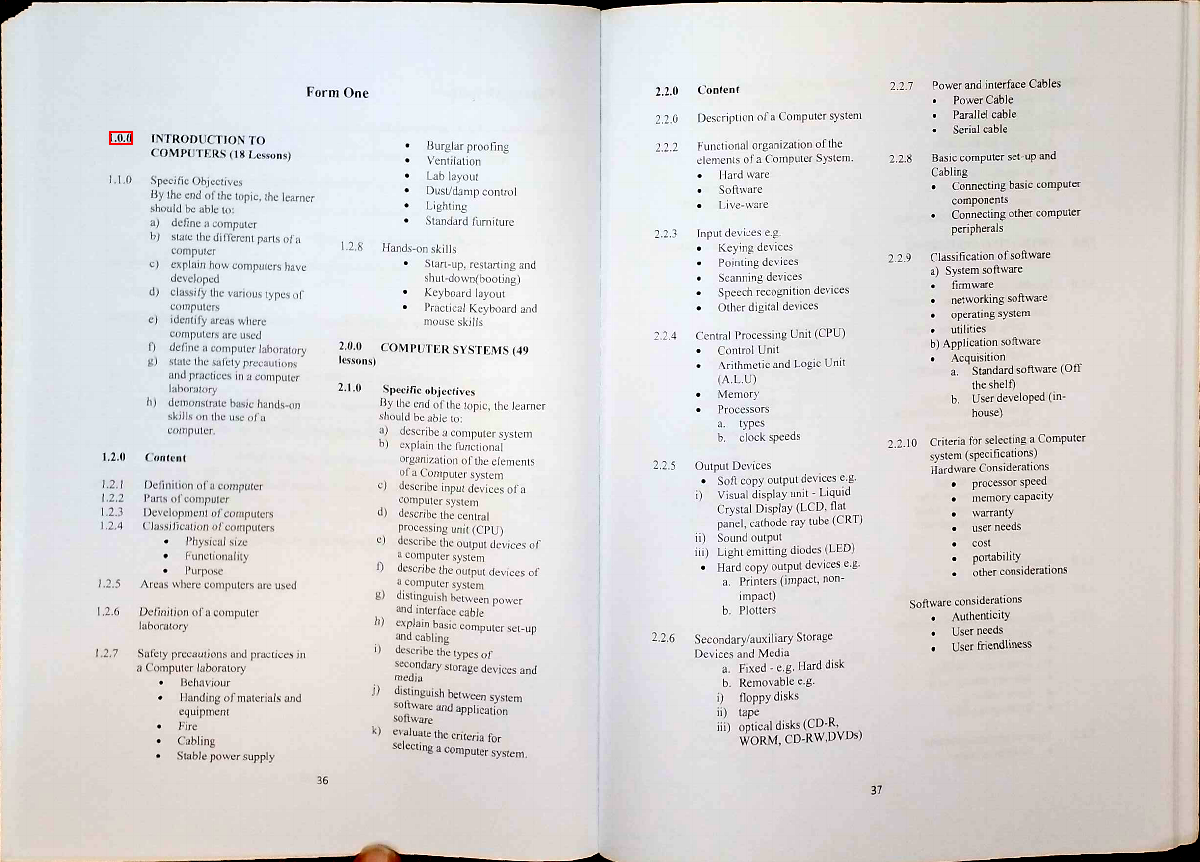

In [17]:
page_image = Image.open(page['image'])
matches = doc.find_text_matches('1.0.0', search_threshold=90)
print('found', len(matches), 'matches')
for match in matches:
    print('match vertices=', match['bounding_box']['vertices'])
    page_image = doc.draw_box(page_image, match['bounding_box'])

page_image


In [18]:
# magic here to read text and convert into a topic tree of curriculum standards